<a href="https://colab.research.google.com/github/hn-iiitd/ML_Project/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [3]:
# !wget https://raw.githubusercontent.com/hn-iiitd/ML_Project/refs/heads/main/online_gaming_behavior_dataset_updated.csv?token=GHSAT0AAAAAACZC6JRX5S72AAGL3DZTJWPYZYWC3DQ
# !mv ./online_gaming_behavior_dataset_updated.csv\?token\=GHSAT0AAAAAACZC6JRX5S72AAGL3DZTJWPYZYWC3DQ online_gaming_behavior_dataset_updated.csv
# ! curl https://drive.google.com/file/d/1YEfzyYEqyvmkdOowMGYFMjW1h5USuoKq/view?usp=sharing
!wget https://raw.githubusercontent.com/hn-iiitd/ML_Project/main/online_gaming_behavior_dataset_updated.csv
df = pd.read_csv('online_gaming_behavior_dataset_updated.csv')
df.head()

--2024-11-29 14:35:05--  https://raw.githubusercontent.com/hn-iiitd/ML_Project/main/online_gaming_behavior_dataset_updated.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3134220 (3.0M) [text/plain]
Saving to: ‘online_gaming_behavior_dataset_updated.csv’

online_gaming_behav 100%[===================>]   2.99M  --.-KB/s    in 0.03s   

2024-11-29 14:35:05 (86.6 MB/s) - ‘online_gaming_behavior_dataset_updated.csv’ saved [3134220/3134220]



,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,EstimatedAnnualIncome
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium,73408
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium,50308
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High,83895
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium,50722
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium,63269


In [4]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,EstimatedAnnualIncome
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium,73408
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium,50308
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High,83895
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium,50722
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium,63269


In [34]:
label_encoder = LabelEncoder()
ToEncode = ['Gender','Location','GameGenre','GameDifficulty','EngagementLevel']
for col in ToEncode:
    df[col] = label_encoder.fit_transform(df[col])

X = df.drop(columns=['PlayerID', 'InGamePurchases','Location','EngagementLevel'])
Y = df['InGamePurchases']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42 , stratify=Y)




In [35]:
print(X_train.head())
print(X_test.head())

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

print(X_train.head())
print(X_test.head())

       Age  Gender  GameGenre  PlayTimeHours  GameDifficulty  SessionsPerWeek  \
16168   16       1          0      23.102538               1                5   
39241   25       0          2      14.334453               1                4   
28916   19       0          3       7.226887               1               10   
4057    30       0          3      21.159043               1               17   
38778   19       0          4      15.656127               0                0   

       AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
16168                        129           94                     9   
39241                         62           16                    13   
28916                         29           24                    49   
4057                          92           81                    23   
38778                         26           43                    48   

       EstimatedAnnualIncome  
16168                  52349  
39241                  7

In [36]:
#DATA SAMPLING
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import ADASYN
from sklearn.utils import shuffle


smote = SMOTE(random_state=42) #SMOTE
X_resampled_SMOTE, y_resampled_SMOTE = smote.fit_resample(X_train, y_train)

tomek = TomekLinks()
X_tomek, y_tomek = tomek.fit_resample(X_train, y_train)  #TOMEK LINKS

smote_ENN = SMOTEENN(random_state=42) #SMOTE_ENN
X_resampled_SMOTE_ENN, y_resampled_SMOTE_ENN = smote_ENN.fit_resample(X_train, y_train)

ADASYN_model = ADASYN(random_state=42) #ADASYN
X_resampled_ADASYN, y_resampled_ADASYN = ADASYN_model.fit_resample(X_train, y_train)


x_combined = pd.concat([pd.DataFrame(X_resampled_SMOTE), pd.DataFrame(X_tomek)], ignore_index=True)
y_combined = pd.concat([pd.Series(y_resampled_SMOTE), pd.Series(y_tomek)], ignore_index=True)

# Shuffling the combined dataset
x_combined, y_combined = shuffle(x_combined, y_combined, random_state=42)
x_new,y_new = shuffle(x_combined,y_combined,random_state=270)
x_random_intersection = x_new.iloc[:32000]
y_random_intersection = y_new.iloc[:32000]



total_data_points = len(x_combined)
desired_samples = 32000

# Calculating step size
step_size = total_data_points // desired_samples

# Ensuring exactly 25,000 entries by slicing up to the required count
x_sampled_sys = x_combined.iloc[:desired_samples * step_size:step_size]
y_sampled_sys = y_combined.iloc[:desired_samples * step_size:step_size]

#reducing
x_sampled_sys = x_sampled_sys.iloc[:desired_samples]
y_sampled_sys = y_sampled_sys.iloc[:desired_samples]









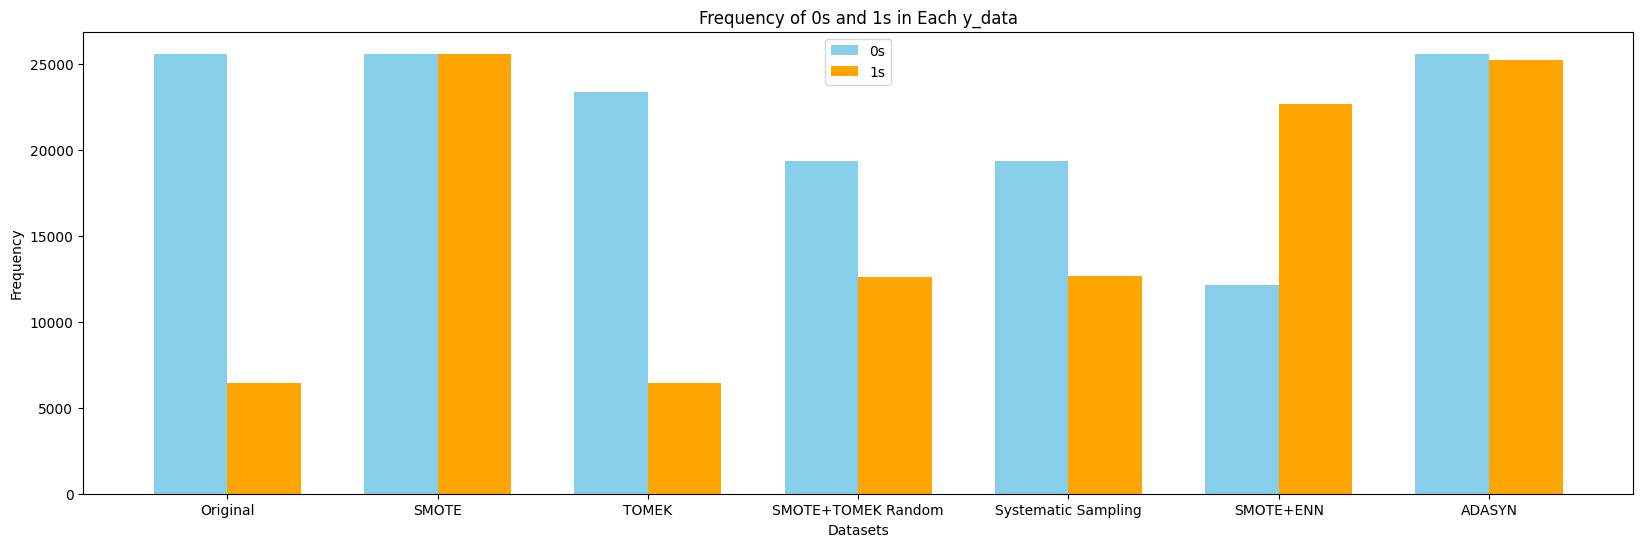

In [37]:
import numpy as np
import matplotlib.pyplot as plt

y_data_list = [y_train,y_resampled_SMOTE,y_tomek,y_random_intersection,y_sampled_sys,y_resampled_SMOTE_ENN,y_resampled_ADASYN]
custom_labels = ['Original','SMOTE', 'TOMEK', 'SMOTE+TOMEK Random','Systematic Sampling' ,'SMOTE+ENN', 'ADASYN']

frequencies = [np.bincount(y, minlength=2) for y in y_data_list]

frequencies = np.array(frequencies)
x = np.arange(len(y_data_list))

# Plotting
width = 0.35  # Bar width
fig, ax = plt.subplots(figsize=(20, 6))

# Bars for 0s and 1s
bar1 = ax.bar(x - width/2, frequencies[:, 0], width, label='0s', color='skyblue')
bar2 = ax.bar(x + width/2, frequencies[:, 1], width, label='1s', color='orange')

ax.set_xlabel('Datasets')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of 0s and 1s in Each y_data')
ax.set_xticks(x)
ax.set_xticklabels(custom_labels)
ax.legend()

plt.show()



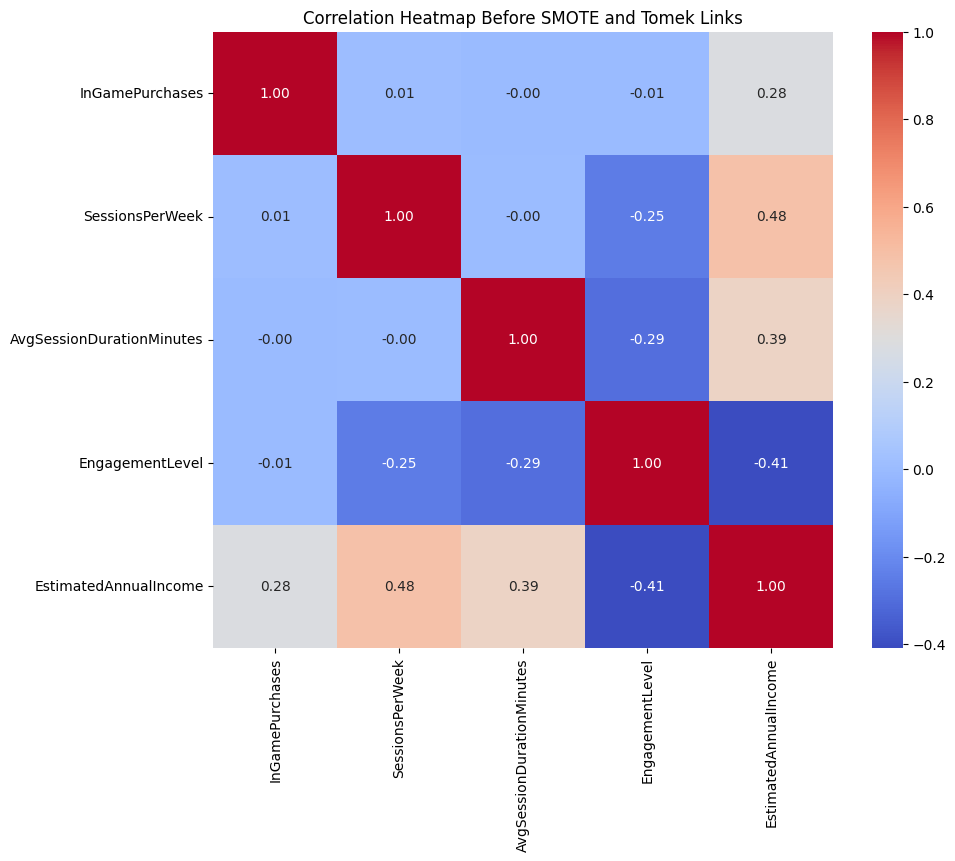

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
x_corr = df.drop(columns = ["PlayerID", "Age", "Gender", "Location", "GameGenre","PlayTimeHours","GameDifficulty","PlayerLevel","AchievementsUnlocked"], axis=1)
y_corr = df['InGamePurchases']

combined_data = x_corr.copy()
combined_data['InGamePurchases'] = y_corr

corr_matrix_before = combined_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_before, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap Before SMOTE and Tomek Links')
plt.show()


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def plot_correlation_heatmap(X_data,y_data,title):

  resampled_data = pd.DataFrame(X_data, columns=X.columns)
  resampled_data = resampled_data.drop(columns = [ "Age", "Gender", "GameGenre","PlayTimeHours","GameDifficulty","PlayerLevel","AchievementsUnlocked"], axis=1)
  resampled_data['InGamePurchases'] = y_data

  corr_matrix = resampled_data.corr()

  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
  plt.title('Correlation Heatmap after '+title)
  plt.show()


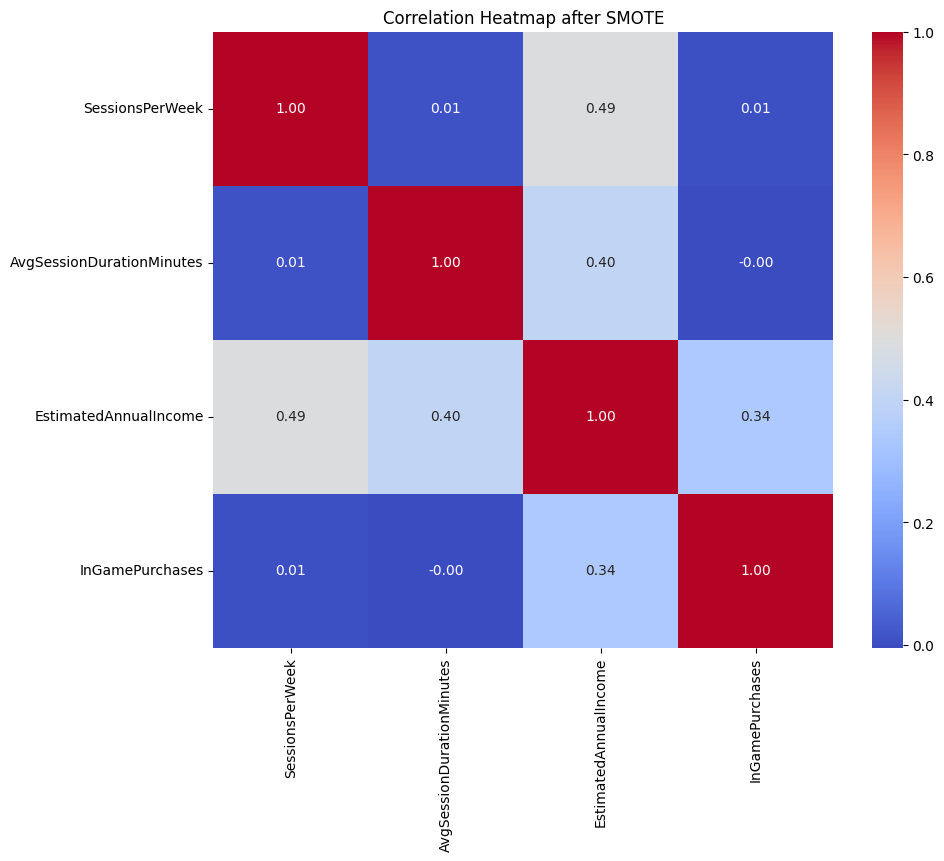

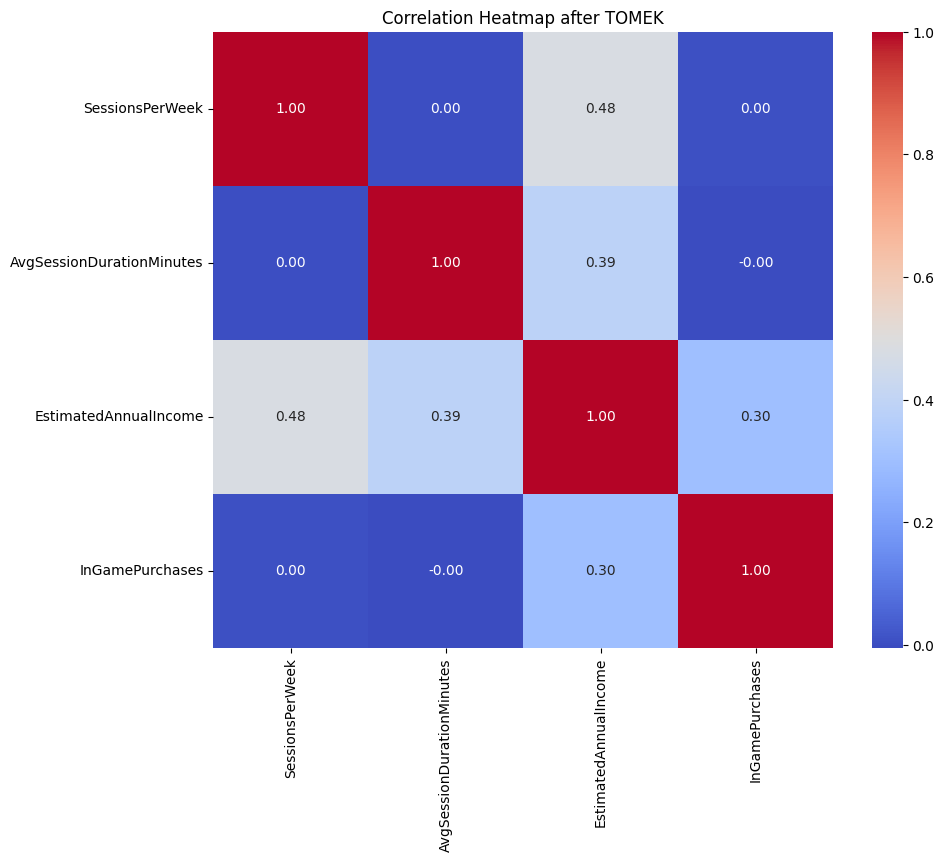

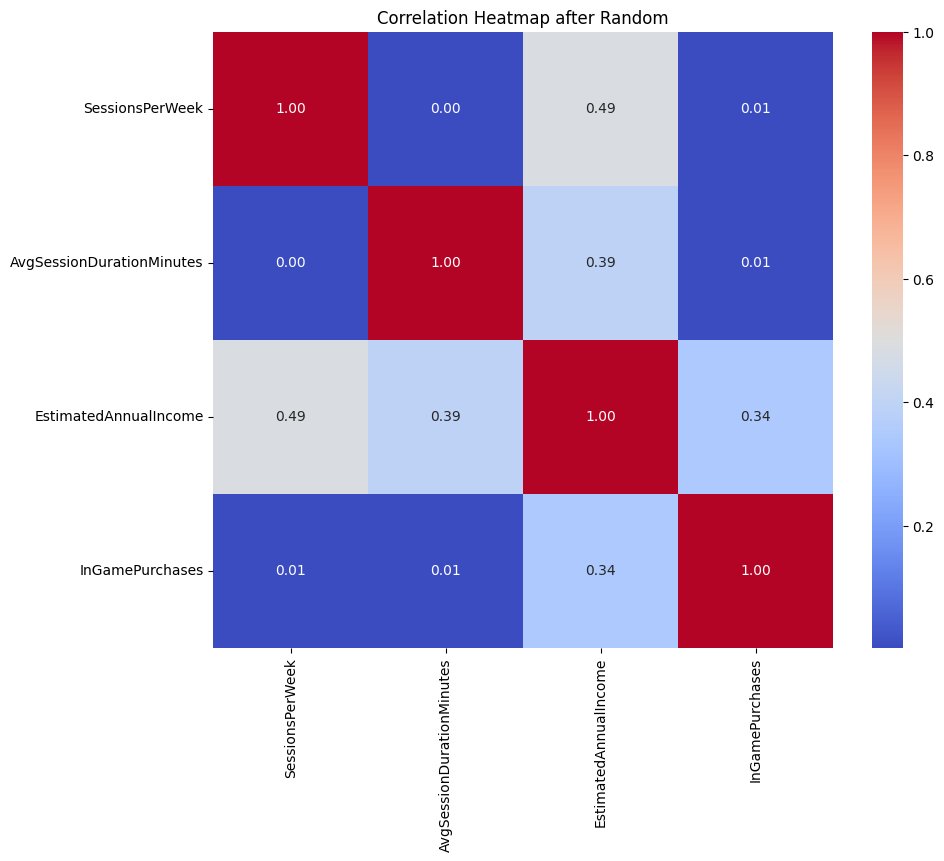

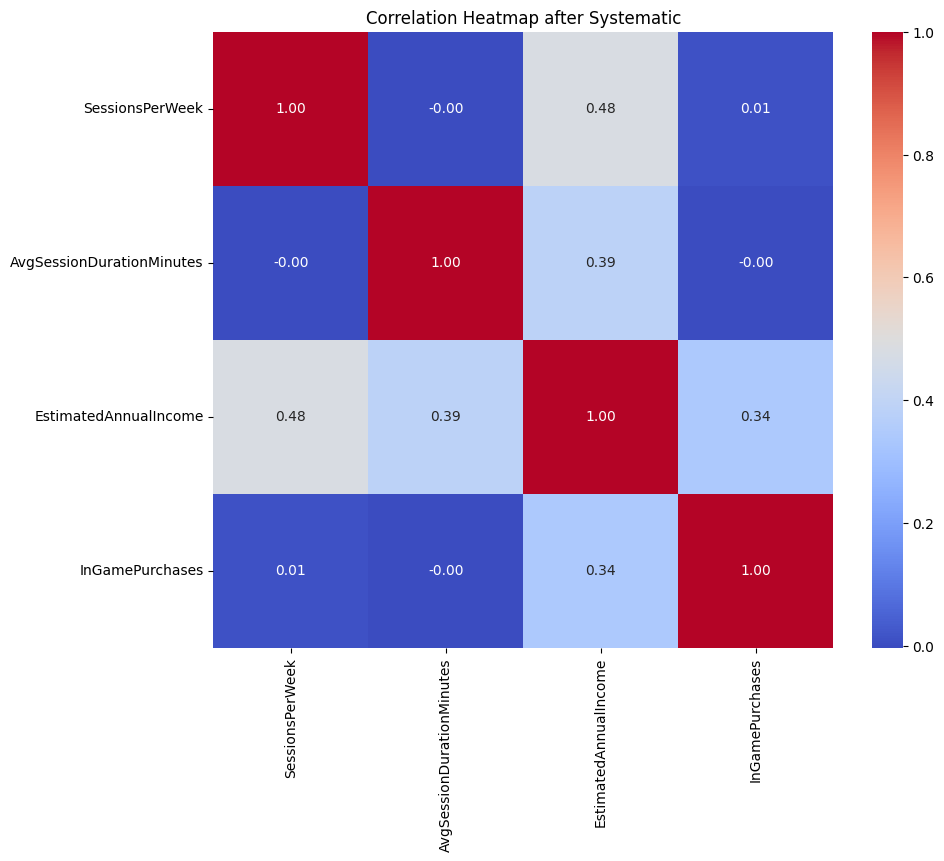

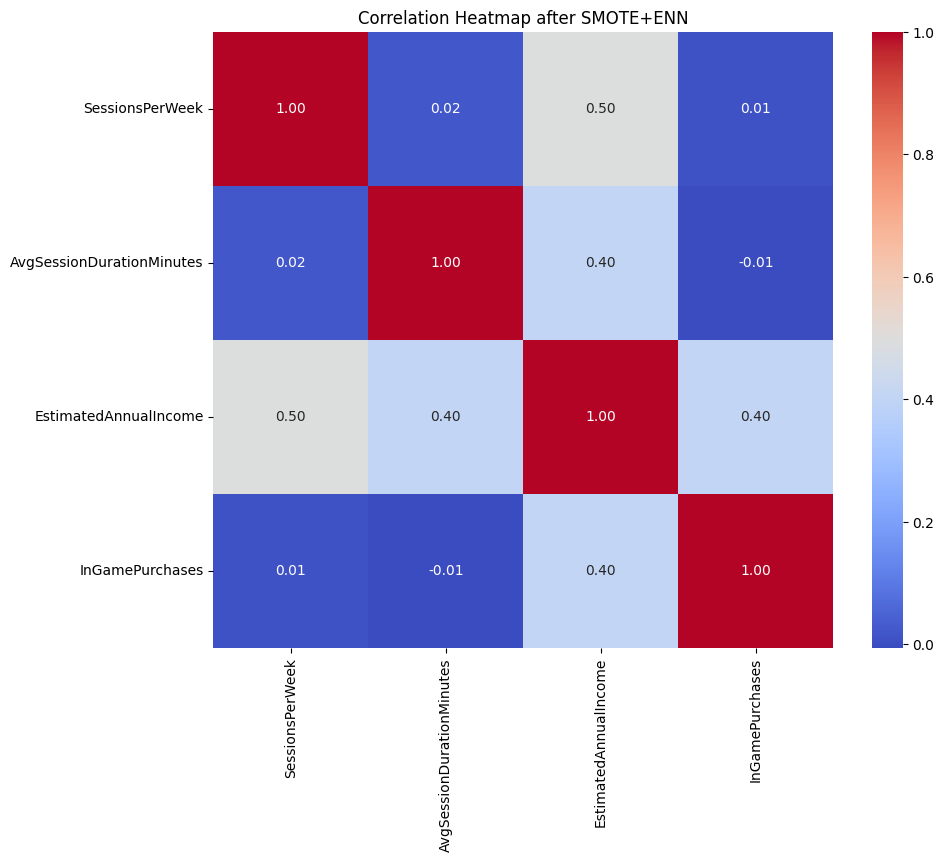

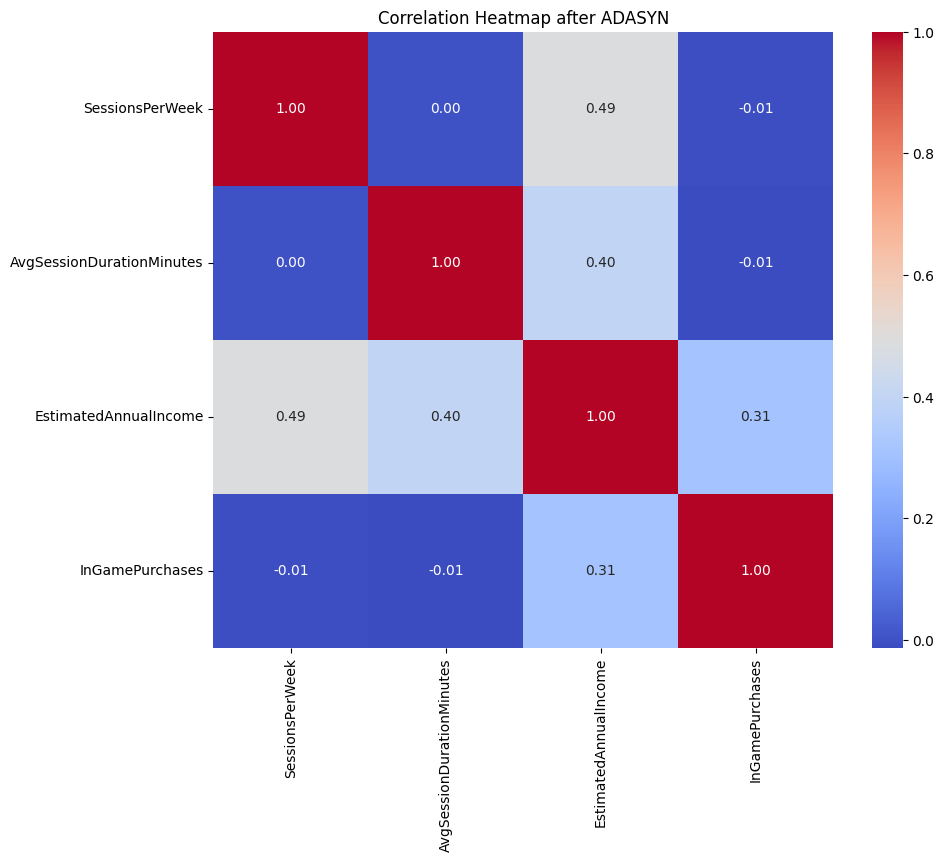

In [40]:
plot_correlation_heatmap(X_resampled_SMOTE,y_resampled_SMOTE,'SMOTE')
plot_correlation_heatmap(X_tomek,y_tomek,'TOMEK')
plot_correlation_heatmap(x_random_intersection,y_random_intersection,'Random')
plot_correlation_heatmap(x_sampled_sys,y_sampled_sys,'Systematic')
plot_correlation_heatmap(X_resampled_SMOTE_ENN,y_resampled_SMOTE_ENN,'SMOTE+ENN')
plot_correlation_heatmap(X_resampled_ADASYN,y_resampled_ADASYN,'ADASYN')


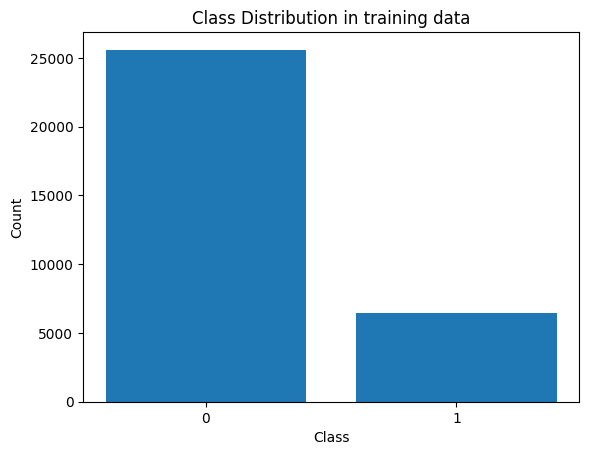

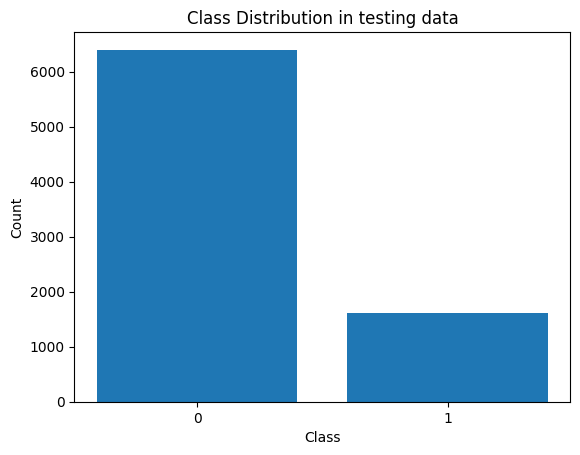

In [41]:
count1= 0
count0 = 0
for i in range(len(y_train)):
  if y_train.values[i] == 1:
    count1 += 1
  else:
    count0 += 1

plt.bar(['0', '1'], [count0, count1])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in training data')
plt.show()
count1= 0
count0 = 0

for i in range(len(y_test)):
  if y_test.values[i] == 1:
    count1 += 1
  else:
    count0 += 1

plt.bar(['0', '1'], [count0, count1])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in testing data')
plt.show()

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

def evaluate_models(x_train_list, y_train_list, x_test, y_test):

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000,random_state=42),
        "Naive Bayes": GaussianNB(),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=500,random_state=42)
    }

    metrics = {}

    for i, (x_train, y_train) in enumerate(zip(x_train_list, y_train_list), 1):
        print(f"Evaluating on Dataset {i}...")
        metrics[f"Dataset {i}"] = {}

        for model_name, model in models.items():
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
            recall = recall_score(y_test, y_pred, average='binary', pos_label=1)

            metrics[f"Dataset {i}"][model_name] = {
                "Accuracy": accuracy,
                "Precision": precision,
                "Recall": recall
            }

    return metrics




In [43]:
import matplotlib.pyplot as plt
import numpy as np

def plot_metrics_grouped_by_datasets(metrics, dataset_names):

    metric_names = ["Accuracy", "Precision", "Recall", "F1-score"]
    model_names = list(next(iter(metrics.values())).keys())
    datasets = list(metrics.keys())

    f1_data = {}
    for dataset in datasets:
        f1_data[dataset] = {}
        for model_name in model_names:
            precision = metrics[dataset][model_name]["Precision"]
            recall = metrics[dataset][model_name]["Recall"]
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
            f1_data[dataset][model_name] = f1

    for dataset in datasets:
        for model_name in model_names:
            metrics[dataset][model_name]["F1-score"] = f1_data[dataset][model_name]

    # Creating grouped bar charts for each metric
    for metric_name in metric_names:
        plt.figure(figsize=(12, 6))
        bar_width = 0.20
        x = np.arange(len(datasets))

        for idx, model_name in enumerate(model_names):
            metric_values = [metrics[dataset][model_name][metric_name] for dataset in datasets]

            scaled_values = [min(value, 1.0) for value in metric_values]

            plt.bar(x + idx * bar_width, scaled_values, width=bar_width, label=model_name)

            for i, (scaled_value, original_value) in enumerate(zip(scaled_values, metric_values)):
                plt.text(x[i] + idx * bar_width, scaled_value + 0.01, f'{original_value:.2f}',
                         ha='center', va='bottom', fontsize=8)

        plt.title(f"Comparison of {metric_name} Across Datasets", fontsize=14)
        plt.xlabel("Dataset", fontsize=12)
        plt.ylabel(f"Scaled {metric_name}", fontsize=12)
        plt.ylim(0, 1.1)
        plt.xticks(x + bar_width * (len(model_names) - 1) / 2, dataset_names, fontsize=10, rotation=45, ha='right')
        plt.legend(title="Model", loc="best", fontsize=10)
        plt.tight_layout()
        plt.show()

In [48]:
x_train_list = [X_train, X_resampled_SMOTE, X_tomek, x_random_intersection, x_sampled_sys, X_resampled_SMOTE_ENN, X_resampled_ADASYN]
y_train_list = [y_train, y_resampled_SMOTE, y_tomek, y_random_intersection, y_sampled_sys, y_resampled_SMOTE_ENN, y_resampled_ADASYN]
results = evaluate_models(x_train_list, y_train_list, X_test, y_test)


Evaluating on Dataset 1...
Evaluating on Dataset 2...
Evaluating on Dataset 3...
Evaluating on Dataset 4...
Evaluating on Dataset 5...
Evaluating on Dataset 6...
Evaluating on Dataset 7...


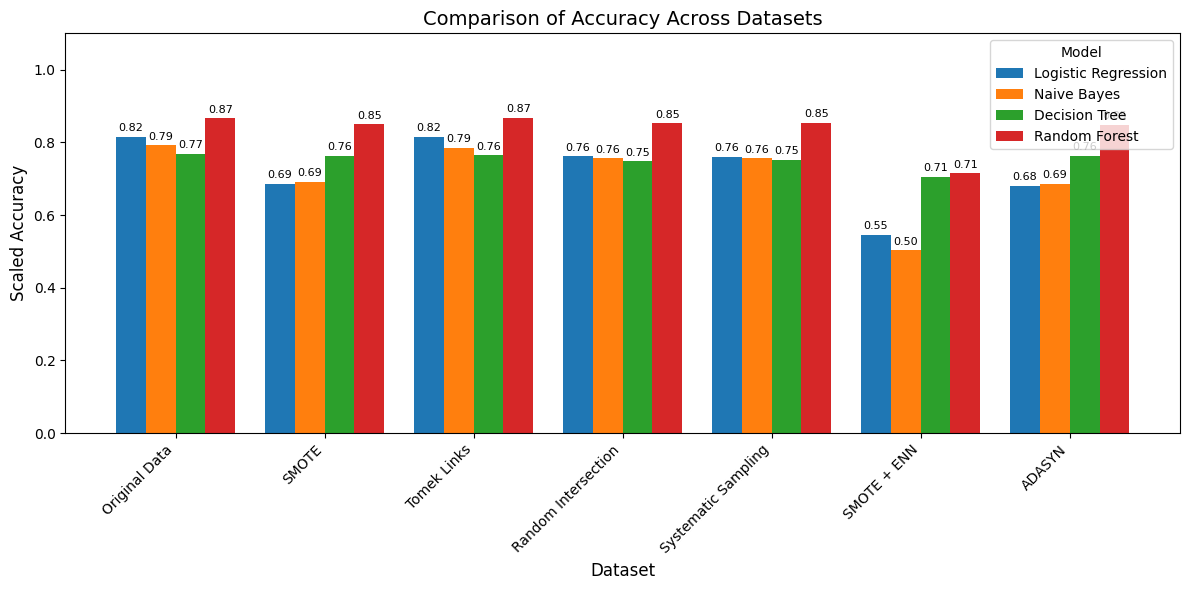

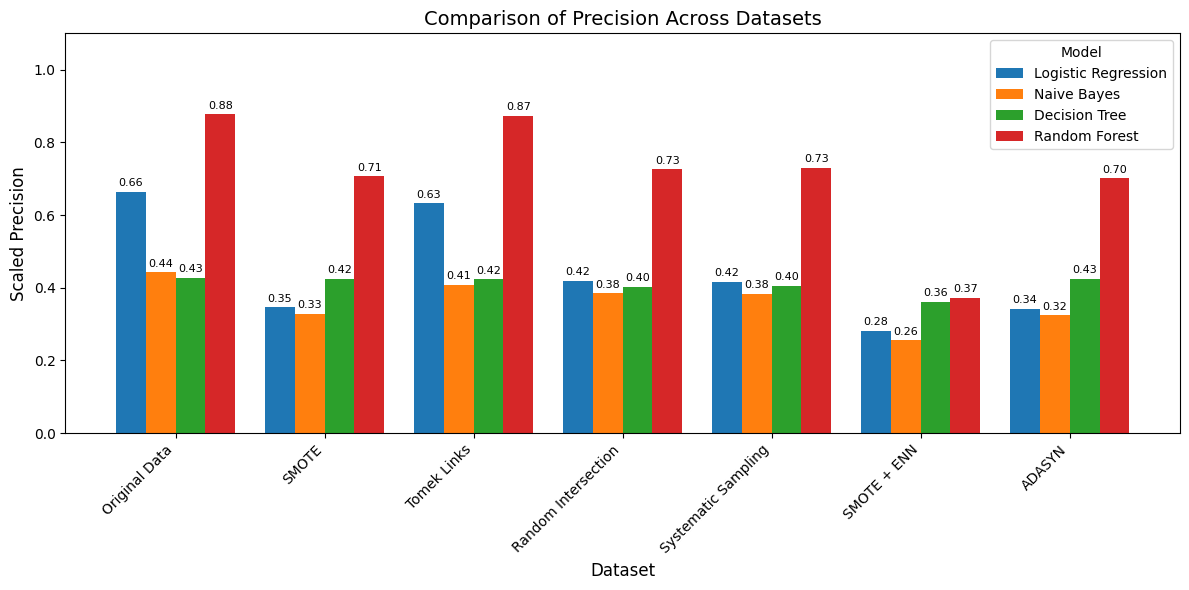

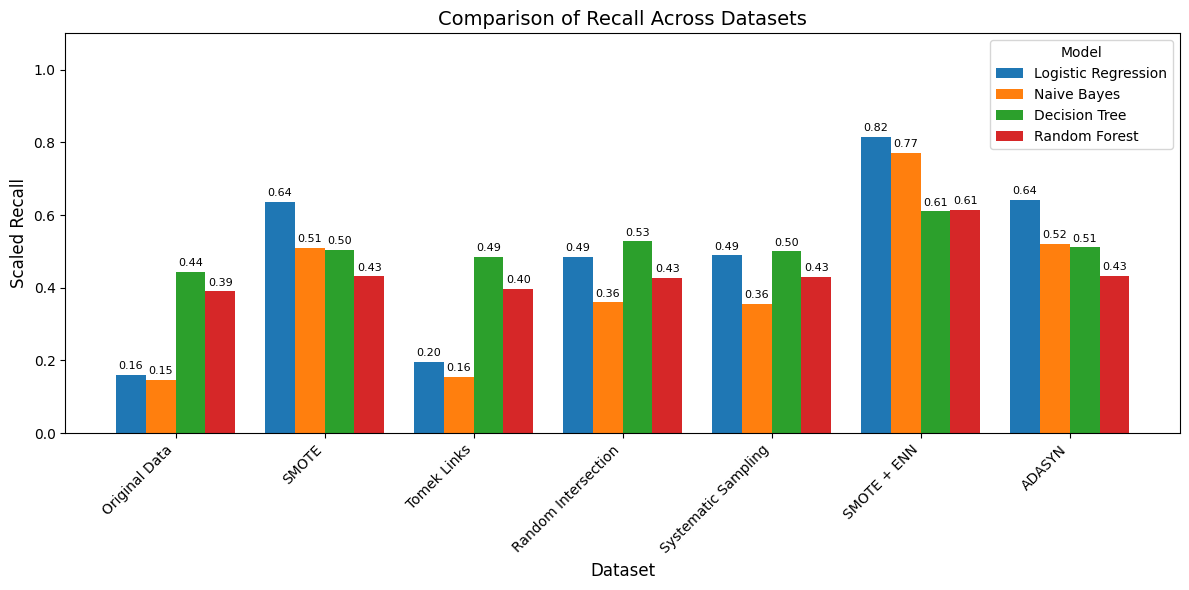

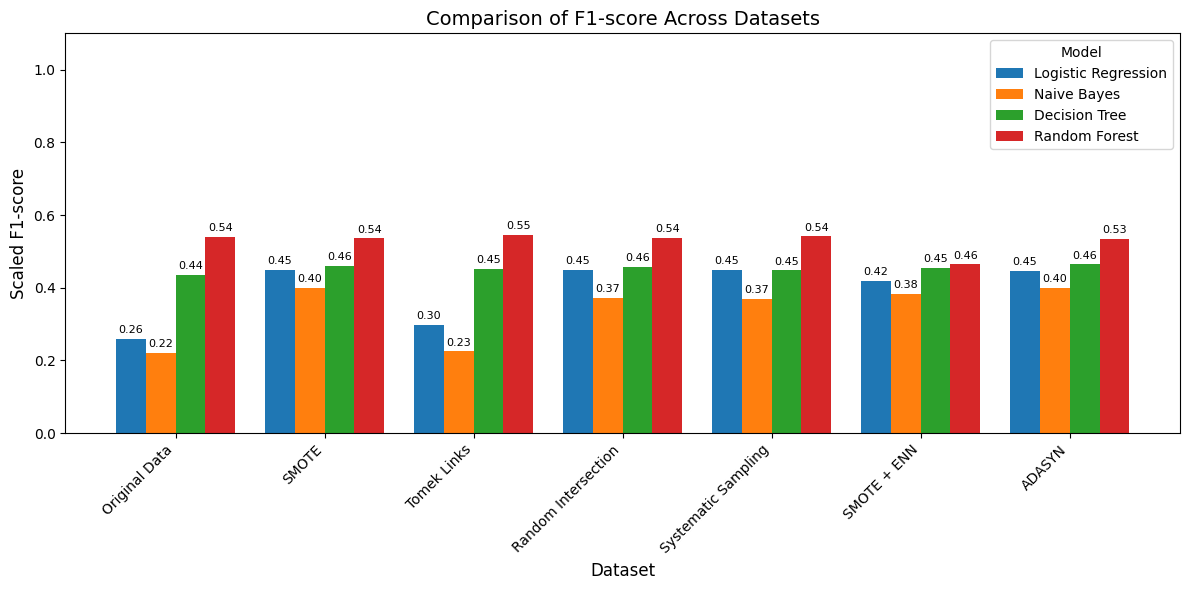

In [49]:
dataset_names = ['Original Data', 'SMOTE', 'Tomek Links', 'Random Intersection', 'Systematic Sampling', 'SMOTE + ENN', 'ADASYN']
plot_metrics_grouped_by_datasets(results, dataset_names)

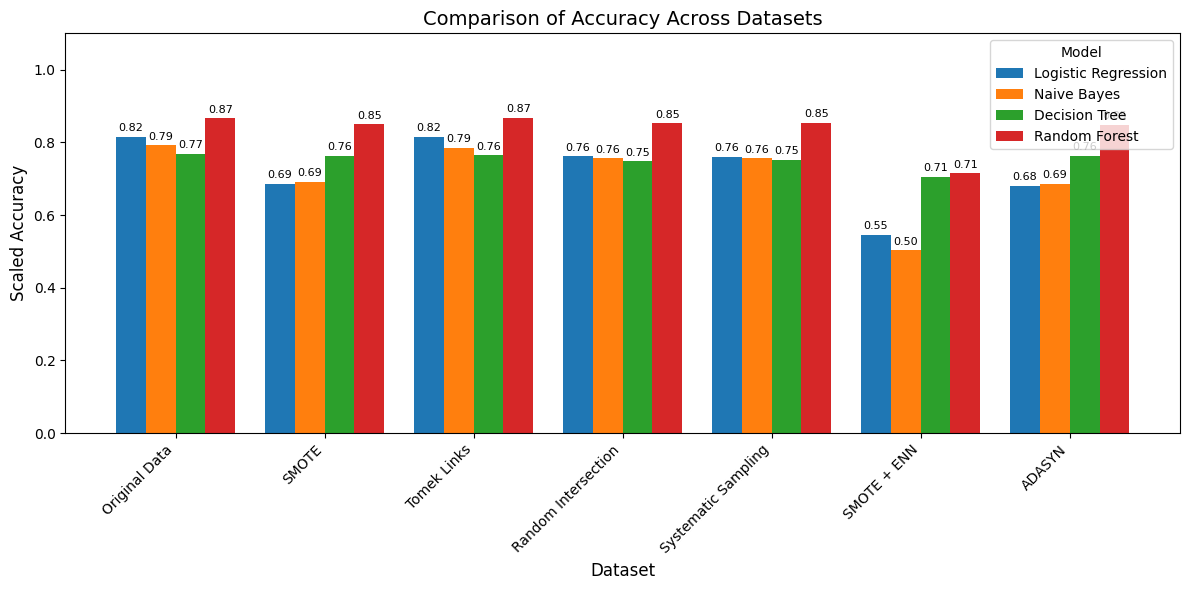

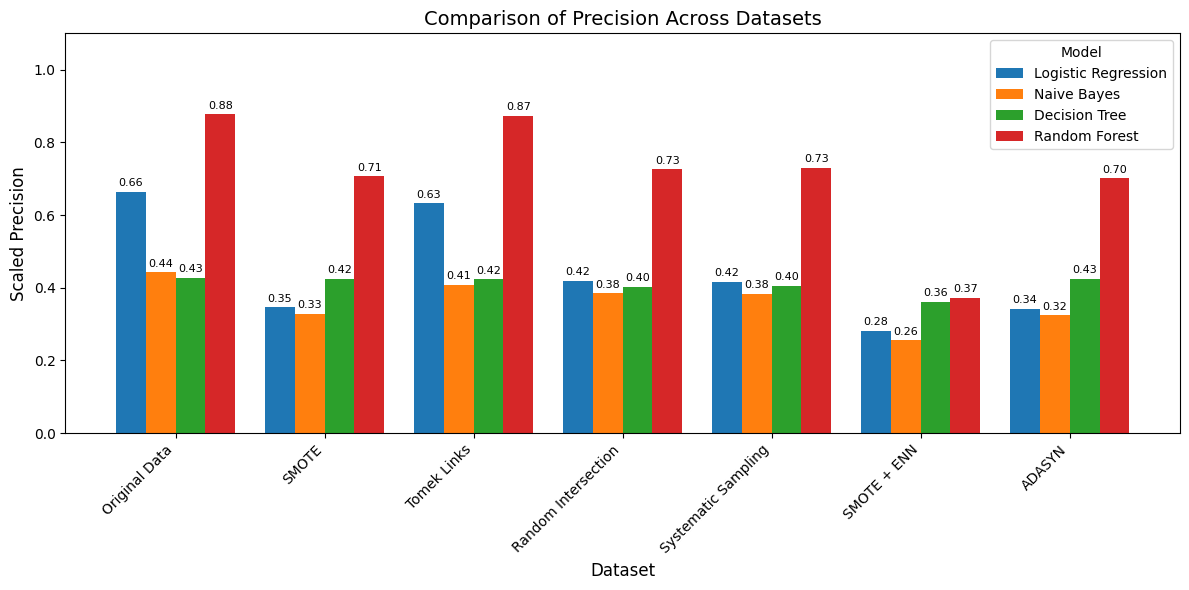

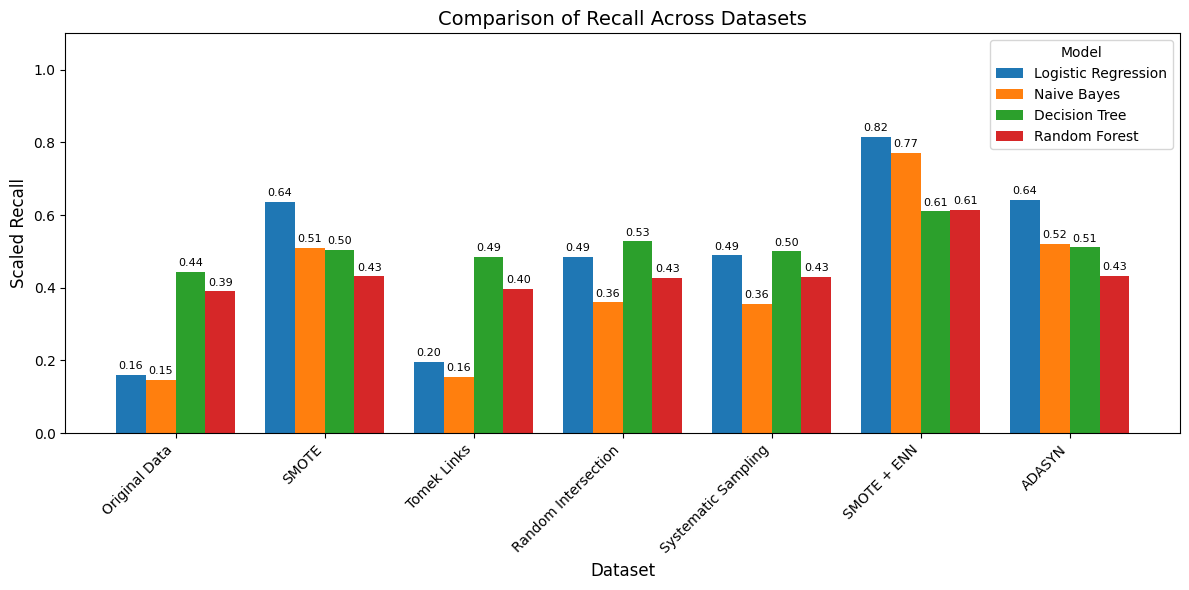

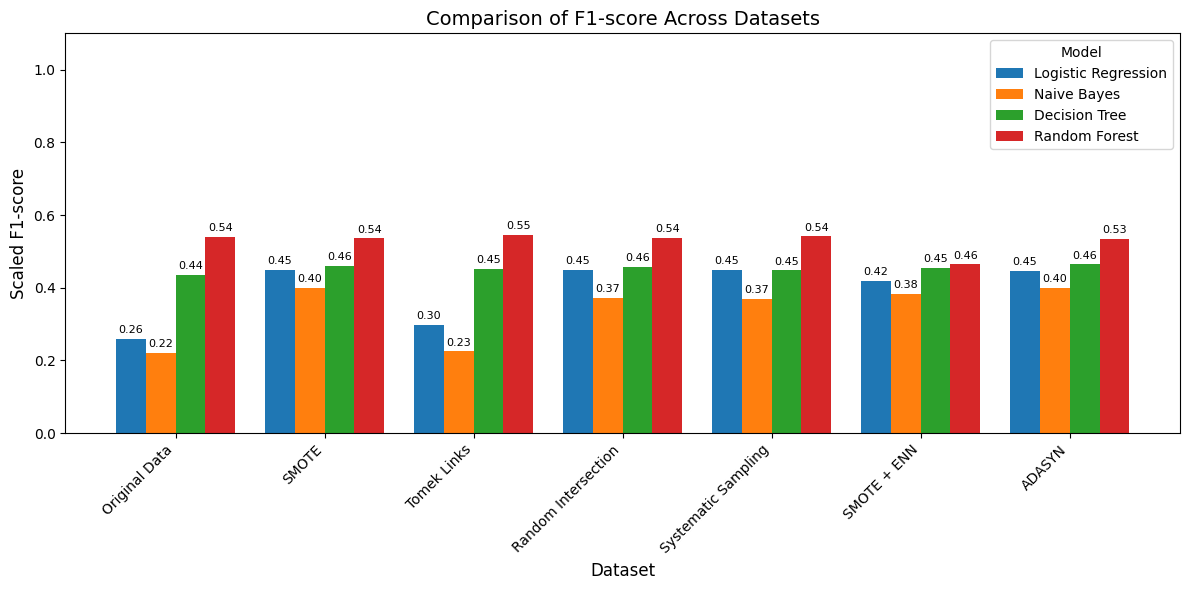

In [53]:
import pickle
# with open('results.pkl', 'wb') as file:
#     pickle.dump(results, file)
dataset_names = ['Original Data', 'SMOTE', 'Tomek Links', 'Random Intersection', 'Systematic Sampling', 'SMOTE + ENN', 'ADASYN']
with open('results.pkl', 'rb') as file:
    loaded_results = pickle.load(file)
plot_metrics_grouped_by_datasets(loaded_results, dataset_names)

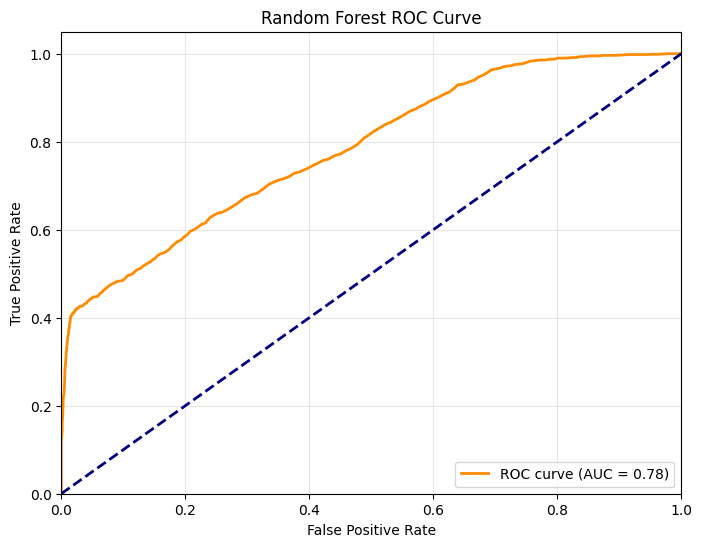

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


from sklearn.metrics import roc_curve, auc

def plot_binary_roc_curve(y_true, y_probas, title='ROC Curve'):
    if y_probas.ndim > 1 and y_probas.shape[1] == 2:
        y_probas = y_probas[:, 1]

    fpr, tpr, thresholds = roc_curve(y_true, y_probas)
    roc_auc = auc(fpr, tpr)

    # Plotting ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

    return {
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc,
        'thresholds': thresholds
    }
rf = RandomForestClassifier(n_estimators= 500)
rf.fit(X_train, y_train)

y_probas = rf.predict_proba(X_test)

result = plot_binary_roc_curve(y_test, y_probas, title='Random Forest ROC Curve')



In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

def grid_search_rf(X_train, y_train, X_test, y_test):

    param_grid = {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 20, 30],
    }

    rf = RandomForestClassifier(random_state=42)

    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

    grid_search.fit(X_train, y_train)

    print("Best parameters found: ", grid_search.best_params_)
    print("Best cross-validation accuracy: ", grid_search.best_score_)

    best_rf = grid_search.best_estimator_
    y_pred = best_rf.predict(X_test)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    return best_rf, grid_search.best_params_




In [16]:
best_model, best_params = grid_search_rf(X_tomek, y_tomek,X_test,y_test)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:  {'max_depth': 20, 'n_estimators': 100}
Best cross-validation accuracy:  0.859430485762144

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      6399
           1       0.86      0.40      0.55      1608

    accuracy                           0.87      8007
   macro avg       0.86      0.69      0.73      8007
weighted avg       0.87      0.87      0.85      8007

